# Exercise 17

## Analyze how travelers expressed their feelings on Twitter

A sentiment analysis job about the problems of each major U.S. airline. 
Twitter data was scraped from February of 2015 and contributors were 
asked to first classify positive, negative, and neutral tweets, followed
by categorizing negative reasons (such as "late flight" or "rude service").

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# read the data and set the datetime as the index
tweets = pd.read_csv('https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/Tweets.zip', index_col=0)

tweets.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,,,,,,,,
570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
tweets.shape

(14640, 14)

### Proportion of tweets with each sentiment

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Proportion of tweets per airline


In [4]:
tweets['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

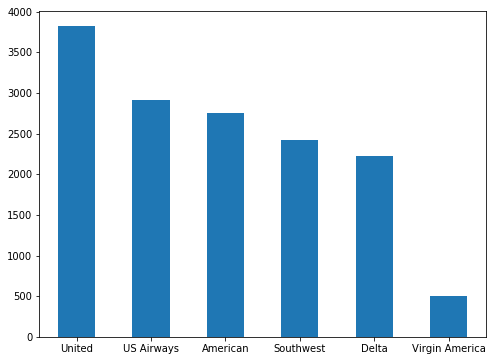

In [5]:
pd.Series(tweets["airline"]).value_counts().plot(kind = "bar",figsize=(8,6),rot = 0)

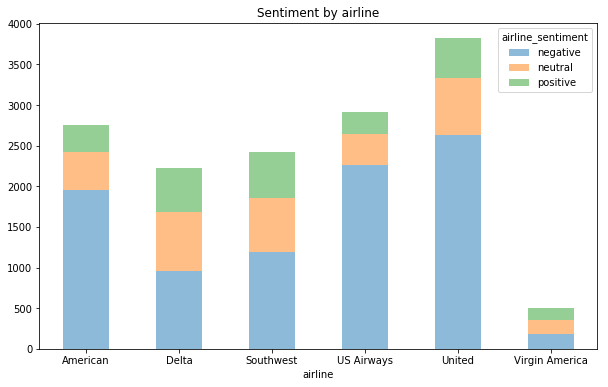

In [6]:
pd.crosstab(index = tweets["airline"],columns = tweets["airline_sentiment"]).plot(kind='bar',figsize=(10, 6),alpha=0.5,rot=0,stacked=True,title="Sentiment by airline")

# Exercise 17.1 

Predict the sentiment using CountVectorizer

use Random Forest classifier

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB

In [8]:
X = tweets['text']
y = tweets['airline_sentiment'].map({'negative':-1,'neutral':0,'positive':1})

In [9]:
vect = CountVectorizer()

In [10]:
nb = MultinomialNB()

In [11]:
def tokenize_test(vect):
    X_dtm = vect.fit_transform(X)
    print('Features: ', X_dtm.shape[1])
    nb = MultinomialNB()
    print(pd.Series(cross_val_score(nb, X_dtm, y, cv=10)).describe())

In [12]:
tokenize_test(vect)

Features:  15051
count    10.000000
mean      0.743646
std       0.024237
min       0.714286
25%       0.727711
50%       0.742915
75%       0.748591
max       0.798497
dtype: float64


In [13]:
tf = pd.DataFrame(vect.fit_transform(X).toarray(), columns=vect.get_feature_names())
tf

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
vect.vocabulary_

{'virginamerica': 14273,
 'what': 14551,
 'dhepburn': 4804,
 'said': 11646,
 'plus': 10438,
 'you': 14944,
 've': 14193,
 'added': 1965,
 'commercials': 4030,
 'to': 13326,
 'the': 13120,
 'experience': 5665,
 'tacky': 12925,
 'didn': 4821,
 'today': 13330,
 'must': 9234,
 'mean': 8837,
 'need': 9375,
 'take': 12941,
 'another': 2331,
 'trip': 13509,
 'it': 7685,
 'really': 11020,
 'aggressive': 2054,
 'blast': 3070,
 'obnoxious': 9726,
 'entertainment': 5455,
 'in': 7381,
 'your': 14953,
 'guests': 6733,
 'faces': 5740,
 'amp': 2263,
 'they': 13167,
 'have': 6868,
 'little': 8392,
 'recourse': 11078,
 'and': 2281,
 'big': 3007,
 'bad': 2746,
 'thing': 13176,
 'about': 1862,
 'seriously': 11914,
 'would': 14778,
 'pay': 10175,
 '30': 761,
 'flight': 6004,
 'for': 6157,
 'seats': 11832,
 'that': 13115,
 'this': 13188,
 'playing': 10403,
 'only': 9836,
 'flying': 6101,
 'va': 14145,
 'yes': 14922,
 'nearly': 9371,
 'every': 5572,
 'time': 13270,
 'fly': 6086,
 'vx': 14345,
 'ear': 5238,


In [15]:
R_forest = RandomForestClassifier(max_depth=None,max_features=None, n_estimators=100, n_jobs=-1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(tf, y, test_size=0.33, random_state=42)

In [18]:
R_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
y_pred1 = R_forest.predict(X_test)

In [20]:
from sklearn import metrics

In [21]:
metrics.accuracy_score(y_pred1, y_test)

0.7636589403973509

# Exercise 17.2 

Remove stopwords, then predict the sentiment using CountVectorizer.

use Random Forest classifier

In [22]:
vect1 = CountVectorizer(stop_words='english')

In [23]:
vect1

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [24]:
tokenize_test(vect1)

Features:  14770
count    10.000000
mean      0.731691
std       0.029063
min       0.697404
25%       0.708940
50%       0.731989
75%       0.744194
max       0.796448
dtype: float64


In [25]:
# set of stop words
print(vect1.get_stop_words())

frozenset({'not', 'too', 'other', 'nor', 'each', 'during', 'about', 'after', 'though', 'fire', 'four', 'whoever', 'alone', 'whether', 'of', 'sixty', 'throughout', 'everywhere', 'being', 'am', 'former', 'much', 'between', 'sincere', 'what', 'seems', 'hasnt', 'last', 'very', 'herein', 'they', 'if', 'ever', 'whereas', 'beforehand', 'amoungst', 'yourself', 'anywhere', 'himself', 'none', 'beside', 'indeed', 'it', 'those', 'whence', 'six', 'will', 'part', 'cannot', 'in', 'nowhere', 'itself', 'whereafter', 'sometimes', 'him', 'onto', 'less', 'there', 'any', 'two', 'otherwise', 'whereby', 'so', 'same', 'twelve', 'show', 'from', 'beyond', 'first', 'cant', 'can', 'mine', 'together', 'inc', 'made', 'wherever', 'by', 'never', 'be', 'themselves', 'how', 'something', 'until', 'before', 'me', 'everything', 'someone', 'sometime', 'such', 'across', 'the', 'somewhere', 'thereby', 'all', 'up', 'still', 'serious', 'everyone', 'per', 'within', 'whom', 'us', 'five', 'detail', 'eleven', 'nine', 'because', 'b

In [26]:
tf1 = pd.DataFrame(vect1.fit_transform(X).toarray(), columns=vect1.get_feature_names())
tf1

,00,000,000114,000419,000ft,000lbs,0011,0016,00a,00am,...,zrh_airport,zsdgzydnde,zsuztnaijq,ztrdwv0n4l,zukes,zurich,zv2pt6trk9,zv6cfpohl5,zvfmxnuelj,zzps5ywve2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
vect1.vocabulary_

{'virginamerica': 14023,
 'dhepburn': 4742,
 'said': 11462,
 'plus': 10257,
 've': 13945,
 'added': 1962,
 'commercials': 3975,
 'experience': 5583,
 'tacky': 12716,
 'didn': 4759,
 'today': 13096,
 'mean': 8703,
 'need': 9229,
 'trip': 13270,
 'really': 10836,
 'aggressive': 2048,
 'blast': 3024,
 'obnoxious': 9567,
 'entertainment': 5381,
 'guests': 6632,
 'faces': 5658,
 'amp': 2245,
 'little': 8262,
 'recourse': 10894,
 'big': 2962,
 'bad': 2715,
 'thing': 12952,
 'seriously': 11724,
 'pay': 9997,
 '30': 761,
 'flight': 5915,
 'seats': 11647,
 'playing': 10223,
 'flying': 6012,
 'va': 13897,
 'yes': 14647,
 'nearly': 9225,
 'time': 13037,
 'fly': 5997,
 'vx': 14095,
 'ear': 5170,
 'worm': 14477,
 'won': 14441,
 'away': 2637,
 'missed': 8906,
 'prime': 10462,
 'opportunity': 9702,
 'men': 8767,
 'hats': 6762,
 'parody': 9927,
 'https': 7074,
 'mwpg7grezp': 9100,
 'amazing': 2209,
 'arrived': 2454,
 'hour': 7042,
 'early': 5173,
 'good': 6485,
 'did': 4758,
 'know': 7950,
 'suicide':

In [28]:
R_forest1 = RandomForestClassifier(max_depth=None,max_features=None, n_estimators=100, n_jobs=-1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(tf1, y, test_size=0.33, random_state=42)

In [30]:
R_forest1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [31]:
y_pred1 = R_forest1.predict(X_test)

In [32]:
metrics.accuracy_score(y_pred1, y_test)

0.7216473509933775

# Exercise 17.3

Increase n_grams size (with and without stopwords),  then predict the sentiment using CountVectorizer

use Random Forest classifier

In [33]:
vect2 = CountVectorizer(stop_words='english', ngram_range=(1, 2),max_features=10000)

In [34]:
vect2

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [35]:
tokenize_test(vect2)

Features:  10000
count    10.000000
mean      0.740574
std       0.040084
min       0.657104
25%       0.726730
50%       0.745051
75%       0.757307
max       0.809426
dtype: float64


In [36]:
# set of stop words
print(vect2.get_stop_words())

frozenset({'not', 'too', 'other', 'nor', 'each', 'during', 'about', 'after', 'though', 'fire', 'four', 'whoever', 'alone', 'whether', 'of', 'sixty', 'throughout', 'everywhere', 'being', 'am', 'former', 'much', 'between', 'sincere', 'what', 'seems', 'hasnt', 'last', 'very', 'herein', 'they', 'if', 'ever', 'whereas', 'beforehand', 'amoungst', 'yourself', 'anywhere', 'himself', 'none', 'beside', 'indeed', 'it', 'those', 'whence', 'six', 'will', 'part', 'cannot', 'in', 'nowhere', 'itself', 'whereafter', 'sometimes', 'him', 'onto', 'less', 'there', 'any', 'two', 'otherwise', 'whereby', 'so', 'same', 'twelve', 'show', 'from', 'beyond', 'first', 'cant', 'can', 'mine', 'together', 'inc', 'made', 'wherever', 'by', 'never', 'be', 'themselves', 'how', 'something', 'until', 'before', 'me', 'everything', 'someone', 'sometime', 'such', 'across', 'the', 'somewhere', 'thereby', 'all', 'up', 'still', 'serious', 'everyone', 'per', 'within', 'whom', 'us', 'five', 'detail', 'eleven', 'nine', 'because', 'b

In [37]:
tf2 = pd.DataFrame(vect2.fit_transform(X).toarray(), columns=vect2.get_feature_names())
tf2

,00,00 pm,000,000 feet,000 miles,0016,00pm,02,03,03 03,...,yr old,yrs,yuma,yup,yvr,yyz,zero,zkatcher,zone,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
vect2.vocabulary_

{'virginamerica': 9523,
 'said': 7213,
 'plus': 6550,
 've': 9464,
 'added': 499,
 'commercials': 1925,
 'experience': 2983,
 'didn': 2539,
 'today': 8496,
 'mean': 5626,
 'need': 5868,
 'trip': 8682,
 'really': 6830,
 'aggressive': 553,
 'entertainment': 2888,
 'guests': 4045,
 'faces': 3035,
 'amp': 882,
 'little': 5341,
 'recourse': 6896,
 'virginamerica really': 9554,
 'big': 1303,
 'bad': 1155,
 'thing': 8354,
 'bad thing': 1162,
 'seriously': 7381,
 'pay': 6287,
 '30': 192,
 'flight': 3186,
 'seats': 7313,
 'playing': 6535,
 'flying': 3585,
 'va': 9451,
 'pay 30': 6290,
 '30 flight': 194,
 'flight seats': 3384,
 'really bad': 6832,
 'yes': 9963,
 'nearly': 5866,
 'time': 8419,
 'fly': 3552,
 'vx': 9583,
 'won': 9847,
 'away': 1117,
 'time fly': 8437,
 'missed': 5769,
 'prime': 6654,
 'opportunity': 6145,
 'men': 5657,
 'hats': 4158,
 'https': 4531,
 'amazing': 658,
 'arrived': 1021,
 'hour': 4396,
 'early': 2799,
 'good': 3897,
 'virginamerica amazing': 9525,
 'hour early': 4406,

In [39]:
X_train, X_test, y_train, y_test = train_test_split(tf2, y, test_size=0.33, random_state=42)

In [40]:
R_forest2 = RandomForestClassifier(max_depth=None,max_features=None, n_estimators=100, n_jobs=-1)

In [41]:
R_forest2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
y_pred2 = R_forest2.predict(X_test)

In [43]:
metrics.accuracy_score(y_pred2, y_test)

0.7220612582781457

In [44]:
metrics.f1_score(y_pred2, y_test, average='micro')

0.7220612582781456

In [45]:
metrics.f1_score(y_pred2, y_test, average='macro')

0.6469518162273955

In [46]:
metrics.recall_score(y_pred2, y_test, average='macro')

0.6513209028322947

In [47]:
metrics.recall_score(y_pred2, y_test, average='micro')

0.7220612582781457

# Exercise 17.4

Predict the sentiment using TfidfVectorizer.

use Random Forest classifier

In [49]:
vect3 = TfidfVectorizer(stop_words='english',ngram_range=(1, 2),max_features=10000)

In [50]:
tokenize_test(vect3)

Features:  10000
count    10.000000
mean      0.719941
std       0.021761
min       0.692202
25%       0.707338
50%       0.718579
75%       0.725286
max       0.756148
dtype: float64


In [52]:
print(vect3.get_stop_words())

frozenset({'not', 'too', 'other', 'nor', 'each', 'during', 'about', 'after', 'though', 'fire', 'four', 'whoever', 'alone', 'whether', 'of', 'sixty', 'throughout', 'everywhere', 'being', 'am', 'former', 'much', 'between', 'sincere', 'what', 'seems', 'hasnt', 'last', 'very', 'herein', 'they', 'if', 'ever', 'whereas', 'beforehand', 'amoungst', 'yourself', 'anywhere', 'himself', 'none', 'beside', 'indeed', 'it', 'those', 'whence', 'six', 'will', 'part', 'cannot', 'in', 'nowhere', 'itself', 'whereafter', 'sometimes', 'him', 'onto', 'less', 'there', 'any', 'two', 'otherwise', 'whereby', 'so', 'same', 'twelve', 'show', 'from', 'beyond', 'first', 'cant', 'can', 'mine', 'together', 'inc', 'made', 'wherever', 'by', 'never', 'be', 'themselves', 'how', 'something', 'until', 'before', 'me', 'everything', 'someone', 'sometime', 'such', 'across', 'the', 'somewhere', 'thereby', 'all', 'up', 'still', 'serious', 'everyone', 'per', 'within', 'whom', 'us', 'five', 'detail', 'eleven', 'nine', 'because', 'b

In [53]:
tf3= pd.DataFrame(vect3.fit_transform(X).toarray(), columns=vect3.get_feature_names())
tf3

,00,00 pm,000,000 feet,000 miles,0016,00pm,02,03,03 03,...,yr old,yrs,yuma,yup,yvr,yyz,zero,zkatcher,zone,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
X_train, X_test, y_train, y_test = train_test_split(tf3, y, test_size=0.33, random_state=42)

In [55]:
R_forest3 = RandomForestClassifier(max_depth=None,max_features=None, n_estimators=100, n_jobs=-1)

In [56]:
R_forest2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
y_pred2 = R_forest2.predict(X_test)

In [58]:
metrics.accuracy_score(y_pred2, y_test),metrics.f1_score(y_pred2, y_test, average='macro'),metrics.recall_score(y_pred2, y_test, average='macro')

(0.7338576158940397, 0.6265300083320038, 0.6653181229847865)